In [1]:
import pandas as pd
import constants as c
import data_analysis as da
import ipywidgets
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
from matplotlib_venn import venn3
import matplotlib.patches as mpatches
%matplotlib inline

In [2]:
all_exoplanets_with_esi = da.calculate_ESI(
    da.create_exoplanets_catalog(".\\data\\phl_exoplanet_catalog.csv")
)
all_exoplanets_with_esi.sort_values(by=['P_calculated_ESI'], ascending=False)

,P_NAME,P_MASS,P_RADIUS,P_TEMP_MEASURED,S_NAME,P_ESCAPE,P_DENSITY,P_DISTANCE,P_FLUX,P_TEMP_EQUIL,...,P_TEMP_EQUIL_MAX,S_RADIUS_EST,S_HZ_OPT_MIN,S_HZ_OPT_MAX,S_HZ_CON_MIN,S_HZ_CON_MAX,P_HABITABLE,P_RADIUS_EST,P_MASS_EST,P_calculated_ESI
3808,TRAPPIST-1 d,0.409998,0.77349,0.0,TRAPPIST-1,0.728054,0.885967,0.021493,1.206561,266.76719,...,276.70953,0.120,0.019436,0.052568,0.024618,0.049836,1,0.773490,0.409998,0.903853
3807,TRAPPIST-1 c,1.379374,1.05374,0.0,TRAPPIST-1,1.144127,1.178912,0.015262,2.399799,316.68392,...,330.84815,0.120,0.019436,0.052568,0.024618,0.049836,0,1.053740,1.379374,0.902225
1029,K2-18 b,8.921432,2.36531,0.0,K2-18,1.942107,0.674171,0.145758,1.075112,257.45111,...,288.56740,0.410,0.120021,0.312115,0.152023,0.295907,2,2.365310,8.921432,0.813958
3809,TRAPPIST-1 e,0.619765,0.91922,0.0,TRAPPIST-1,0.821114,0.797937,0.028272,0.699734,232.69554,...,243.37390,0.120,0.019436,0.052568,0.024618,0.049836,1,0.919220,0.619765,0.813324
2890,Kepler-413 b,67.061709,4.34948,0.0,Kepler-413,3.926618,0.815009,0.357778,2.121919,306.67940,...,326.85487,0.780,0.409344,1.002228,0.518497,0.950201,0,4.349480,67.061709,0.793707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1544,Kepler-1142 b,0.000000,1.46851,0.0,Kepler-1142,0.000000,0.000000,0.134517,47.664865,669.41356,...,669.41356,0.960,0.700843,1.655374,0.887707,1.569444,0,1.468510,2.756832,0.000000
1545,Kepler-1143 b,0.000000,1.67029,0.0,Kepler-1143,0.000000,0.000000,0.036996,253.015540,1016.08890,...,1016.08890,0.770,0.459759,1.109271,0.582352,1.051688,0,1.670290,3.430381,0.000000
1546,Kepler-1143 c,0.000000,3.59841,0.0,Kepler-1143,0.000000,0.000000,0.645682,0.830672,243.22168,...,243.22168,0.770,0.459759,1.109271,0.582352,1.051688,0,3.598410,12.625501,0.000000
1547,Kepler-1144 b,0.000000,1.99538,0.0,Kepler-1144,0.000000,0.000000,0.129231,54.159215,691.13518,...,691.13518,0.960,0.714804,1.685184,0.905388,1.597707,0,1.995380,4.639480,0.000000


In [3]:
planets_in_habitable_zone = da.get_habitable_zone_planets(all_exoplanets_with_esi)
planets_in_habitable_zone

,P_NAME,P_MASS,P_RADIUS,P_TEMP_MEASURED,S_NAME,P_ESCAPE,P_DENSITY,P_DISTANCE,P_FLUX,P_TEMP_EQUIL,...,P_TEMP_EQUIL_MAX,S_RADIUS_EST,S_HZ_OPT_MIN,S_HZ_OPT_MAX,S_HZ_CON_MIN,S_HZ_CON_MAX,P_HABITABLE,P_RADIUS_EST,P_MASS_EST,P_calculated_ESI
20,47 UMa b,804.104850,0.00,0.0,47 UMa,0.0,0.0,2.101075,0.370624,198.74440,...,202.01566,1.230000,0.952603,2.237765,1.206586,2.121605,0,13.215704,804.104850,0.0
29,55 Cnc f,44.813748,0.00,0.0,55 Cnc,0.0,0.0,0.824652,0.975823,248.65483,...,300.05069,0.940000,0.589210,1.413944,0.746319,1.340546,0,7.588509,44.813748,0.0
34,7 CMa b,781.856890,0.00,0.0,7 CMa,0.0,0.0,1.976706,0.687812,229.87309,...,261.07894,2.300000,1.249978,3.048219,1.583287,2.889982,0,13.232029,781.856890,0.0
42,BD+14 4559 b,330.541120,0.00,0.0,BD+14 4559,0.0,0.0,0.812799,0.637010,223.91170,...,267.16735,0.860000,0.480025,1.167039,0.608024,1.106457,0,13.742892,330.541120,0.0
51,BD+49 828 b,508.524800,0.00,0.0,BD+49 828,0.0,0.0,4.457250,1.869632,290.77041,...,363.52406,7.600000,4.365297,10.578441,5.529298,10.029309,0,13.484857,508.524800,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,Wolf 1061 c,3.410295,0.00,0.0,Wolf 1061,0.0,0.0,0.089538,1.364273,274.71341,...,291.41665,0.310000,0.084920,0.222081,0.107563,0.210548,1,1.664522,3.410295,0.0
4035,tau Cet e,3.931532,0.00,0.0,tau Cet,0.0,0.0,0.546716,1.613943,285.39203,...,315.80721,0.793000,0.521647,1.245277,0.660739,1.180636,1,1.809973,3.931532,0.0
4043,K2-296 b,0.000000,1.87,0.0,K2-296,0.0,0.0,0.134560,1.402963,277.27227,...,277.27227,0.374241,0.129844,0.332413,0.164468,0.315153,2,1.870000,4.155456,0.0
4046,GJ 1061 c,1.750000,0.00,0.0,GJ 1061,0.0,0.0,0.035000,1.353492,274.79498,...,274.79498,0.156000,0.033497,0.089216,0.042427,0.084582,1,1.178333,1.750000,0.0


In [4]:
potentially_habitable_exoplanets = da.get_potentially_habitable_exoplanets(all_exoplanets_with_esi)
potentially_habitable_exoplanets

,P_NAME,P_MASS,P_RADIUS,P_TEMP_MEASURED,S_NAME,P_ESCAPE,P_DENSITY,P_DISTANCE,P_FLUX,P_TEMP_EQUIL,...,P_TEMP_EQUIL_MAX,S_RADIUS_EST,S_HZ_OPT_MIN,S_HZ_OPT_MAX,S_HZ_CON_MIN,S_HZ_CON_MAX,P_HABITABLE,P_RADIUS_EST,P_MASS_EST,P_calculated_ESI
135,GJ 143 b,22.699276,2.61193,0.0,GJ 143,2.947985,1.273877,0.194884,5.489527,387.35278,...,430.82133,0.69,0.353763,0.868454,0.448095,0.823371,0,2.61193,22.699276,0.687067
157,GJ 357 b,1.840224,1.22189,0.0,GJ 357,1.227211,1.008729,0.035000,12.760347,481.51579,...,481.51579,0.34,0.102252,0.265280,0.129517,0.251505,0,1.22189,1.840224,0.654383
830,HD 80606 b,1392.086700,11.99470,0.0,HD 80606,10.773044,0.806674,0.679997,11.188809,335.83774,...,1371.27250,1.04,0.731794,1.734764,0.926913,1.644713,0,11.99470,1392.086700,0.636489
981,K2-146 c,7.494384,2.18595,0.0,K2-146,1.851603,0.717489,0.034195,11.047922,463.98709,...,482.60072,0.33,0.092697,0.241911,0.117413,0.229348,0,2.18595,7.494384,0.617501
1029,K2-18 b,8.921432,2.36531,0.0,K2-18,1.942107,0.674171,0.145758,1.075112,257.45111,...,288.56740,0.41,0.120021,0.312115,0.152023,0.295907,2,2.36531,8.921432,0.813958
1146,K2-263 b,14.801250,2.41015,0.0,K2-263,2.478148,1.057222,0.259822,8.199650,429.52093,...,463.73505,0.85,0.563433,1.343933,0.713665,1.274170,0,2.41015,14.801250,0.663082
1153,K2-266 e,14.299082,2.73524,0.0,K2-266,2.286422,0.698750,0.125015,9.496532,447.08024,...,457.06686,0.70,0.309783,0.773185,0.392388,0.733046,0,2.73524,14.299082,0.619196
1179,K2-285 e,10.701269,1.95054,0.0,K2-285,2.342287,1.442018,0.180410,10.524318,458.87394,...,458.87394,0.79,0.458968,1.110782,0.581350,1.053121,0,1.95054,10.701269,0.603094
1337,KOI-3680 b,613.408050,11.09790,0.0,KOI-3680,7.434544,0.448773,0.599686,3.852492,338.90719,...,485.32800,0.96,0.730671,1.719101,0.925484,1.629864,0,11.09790,613.408050,0.607695
1489,Kepler-11 g,25.108412,3.32937,0.0,Kepler-11,2.746177,0.680351,0.471243,4.822324,375.93190,...,408.33268,1.06,0.768871,1.817189,0.973874,1.722860,0,3.32937,25.108412,0.694571


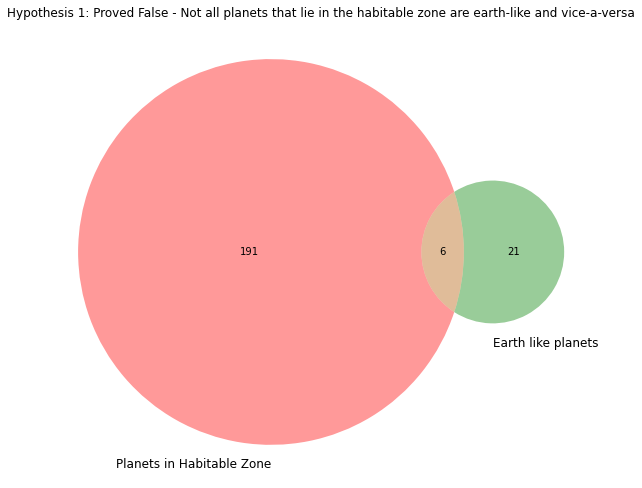

In [5]:
plt.figure(figsize=(10,10))
plt.title('Hypothesis 1: Proved False - Not all planets that lie in the habitable zone are earth-like and vice-a-versa')
venn2([set(planets_in_habitable_zone['P_NAME'].to_list()), 
       set(potentially_habitable_exoplanets['P_NAME'].to_list())],
       set_labels=('Planets in Habitable Zone', 'Earth like planets')
     )
plt.show()

In [6]:
set(planets_in_habitable_zone['P_NAME'].to_list()).intersection(set(potentially_habitable_exoplanets['P_NAME'].to_list()))

{'K2-18 b',
 'LHS 1140 b',
 'TRAPPIST-1 d',
 'TRAPPIST-1 e',
 'TRAPPIST-1 f',
 'TRAPPIST-1 g'}

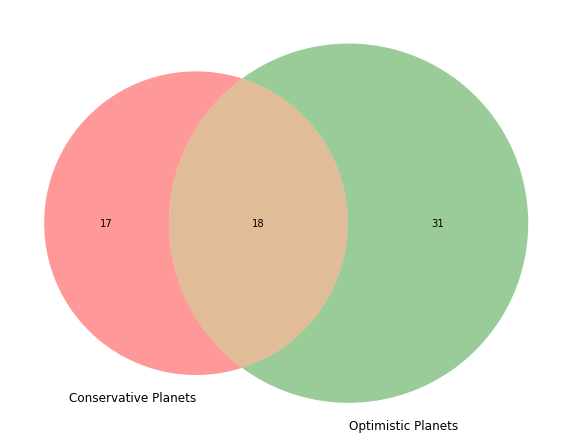

In [7]:
plt.figure(figsize=(10,10))
venn2([set(da.identify_habitability_type(planets_in_habitable_zone)[0]['P_NAME'].to_list()), 
       set(da.identify_habitability_type(planets_in_habitable_zone)[1]['P_NAME'].to_list())],
       set_labels=('Conservative Planets', 'Optimistic Planets')
     )
plt.show()

In [8]:
set(da.identify_habitability_type(planets_in_habitable_zone)[0]['P_NAME'].to_list()).intersection(
set(da.identify_habitability_type(planets_in_habitable_zone)[1]['P_NAME'].to_list()))

{'GJ 273 b',
 'GJ 667 C c',
 'K2-288 B b',
 'K2-296 b',
 'K2-3 d',
 'Kepler-1410 b',
 'Kepler-1544 b',
 'Kepler-1606 b',
 'Kepler-1638 b',
 'Kepler-1652 b',
 'Kepler-283 c',
 'Kepler-296 e',
 'Kepler-296 f',
 'Kepler-440 b',
 'Kepler-452 b',
 'Kepler-62 e',
 'Wolf 1061 c',
 'tau Cet e'}

In [9]:
frames = [planets_in_habitable_zone, potentially_habitable_exoplanets]
combined_planets = pd.concat(frames).drop_duplicates().reset_index(drop=True)
combined_planets = combined_planets.sort_values(by=['S_HZ_OPT_MAX'], ascending=True)

In [10]:
@ipywidgets.interact(planet_name = combined_planets['P_NAME'].tolist(), value='')
def plot_habitable_zone(planet_name):
    planet_values = combined_planets.loc[combined_planets['P_NAME']==planet_name]
    figure, axes = plt.subplots(figsize=(10,10))
    plt.axis([0,2,0,2])
    star_position = plt.Circle(
        (1, 1),
        planet_values['S_RADIUS_EST'] * 0.00465047) 
    planet_orbit = plt.Circle(
        (1, 1),
        planet_values['P_DISTANCE'],
        color='r',
        fill = False,
        linewidth=4) 
    inner_edge_optimistic = plt.Circle(
        (1, 1),
        planet_values['S_HZ_OPT_MIN'],
        color='g',
        fill = False) 
    inner_edge_conservative = plt.Circle(
        (1, 1),
        planet_values['S_HZ_CON_MIN'],
        color='b',
        fill = False) 
    outer_edge_conservative = plt.Circle(
        (1, 1),
        planet_values['S_HZ_CON_MAX'],
        color='b',
        fill = False) 
    outer_edge_optimistic = plt.Circle(
        (1, 1),
        planet_values['S_HZ_OPT_MAX'],
        color='g',
        fill = False) 
    axes.set_aspect(1)
    axes.add_artist(star_position)
    axes.add_artist(planet_orbit)
    axes.add_artist(inner_edge_optimistic)
    axes.add_artist(inner_edge_conservative)
    axes.add_artist(outer_edge_conservative)
    axes.add_artist(outer_edge_optimistic)
    black_patch = mpatches.Patch(color='black', label='Star')
    red_patch = mpatches.Patch(color='red', label='Planet Orbit')
    green_patch = mpatches.Patch(color='green', label='Optimistic zone')
    blue_patch = mpatches.Patch(color='blue', label='Conservative zone')
    figure.legend(handles=[red_patch, blue_patch, black_patch, green_patch])
    plt.title(planet_name)
    plt.axis('off')
    plt.show()

interactive(children=(Dropdown(description='planet_name', options=('TRAPPIST-1 c', 'TRAPPIST-1 f', 'TRAPPIST-1…

In [11]:
common_planets = pd.merge(planets_in_habitable_zone, potentially_habitable_exoplanets, how ='inner', on =['P_NAME'])
common_planets

,P_NAME,P_MASS_x,P_RADIUS_x,P_TEMP_MEASURED_x,S_NAME_x,P_ESCAPE_x,P_DENSITY_x,P_DISTANCE_x,P_FLUX_x,P_TEMP_EQUIL_x,...,P_TEMP_EQUIL_MAX_y,S_RADIUS_EST_y,S_HZ_OPT_MIN_y,S_HZ_OPT_MAX_y,S_HZ_CON_MIN_y,S_HZ_CON_MAX_y,P_HABITABLE_y,P_RADIUS_EST_y,P_MASS_EST_y,P_calculated_ESI_y
0,K2-18 b,8.921432,2.36531,0.0,K2-18,1.942107,0.674171,0.145758,1.075112,257.45111,...,288.56740,0.41,0.120021,0.312115,0.152023,0.295907,2,2.36531,8.921432,0.813958
1,LHS 1140 b,6.979503,1.72634,0.0,LHS 1140,2.010708,1.356580,0.093768,0.483307,212.27899,...,218.99838,0.21,0.053340,0.140342,0.067563,0.133053,2,1.72634,6.979503,0.708638
2,TRAPPIST-1 d,0.409998,0.77349,0.0,TRAPPIST-1,0.728054,0.885967,0.021493,1.206561,266.76719,...,276.70953,0.12,0.019436,0.052568,0.024618,0.049836,1,0.77349,0.409998,0.903853
3,TRAPPIST-1 e,0.619765,0.91922,0.0,TRAPPIST-1,0.821114,0.797937,0.028272,0.699734,232.69554,...,243.37390,0.12,0.019436,0.052568,0.024618,0.049836,1,0.91922,0.619765,0.813324
4,TRAPPIST-1 f,0.680152,1.04253,0.0,TRAPPIST-1,0.807716,0.600261,0.037174,0.402762,202.80710,...,209.56620,0.12,0.019436,0.052568,0.024618,0.049836,1,1.04253,0.680152,0.695922
5,TRAPPIST-1 g,1.341234,1.13221,0.0,TRAPPIST-1,1.088401,0.924110,0.045184,0.272514,183.94526,...,189.87025,0.12,0.019436,0.052568,0.024618,0.049836,1,1.13221,1.341234,0.693644
